<a href="https://colab.research.google.com/github/mayssajeb94/Test_DS/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive

#This will ask for permission
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.==  Read data
Enter your Json file:/content/drive/My Drive/Brisbane_CityBike.json
New Dataframe:
       latitude   longitude
0   -27.482279  153.028723
1   -27.470590  153.036046
2   -27.474531  153.042728
3   -27.461881  153.046986
4   -27.469658  153.016696
..         ...         ...
144 -27.465880  153.026861
145 -27.470110  153.025627
146 -27.462665  153.029087
147 -27.468120  153.026820
148 -27.481137  153.019284

[149 rows x 2 columns]
2.choise of groupe number


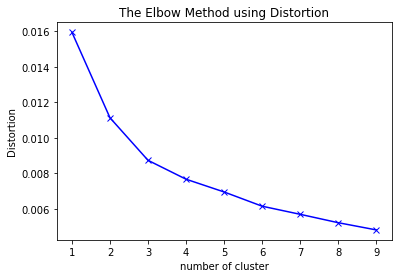

enter the appropriate number of groups:3
3.clustering Data
4.export Data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,latitude,longitude,address,name,groupe
112,-27.480885,153.014585,Besant St / Vulture St,102 - BESANT ST / VULTURE ST,0
120,-27.485075,152.990627,Jephson St / Sherwood Rd,144 - JEPHSON ST / SHERWOOD RD,0
116,-27.476660,153.013287,Melbourne St / Edmondstone St,100 - MELBOURNE ST / EDMONDSTONE ST,0
115,-27.489807,153.002405,Orleigh St / Hoogley St,106 - ORLEIGH ST / HOOGLEY ST,0
32,-27.468839,153.011115,Coronation Dr / Go Between Bridge,133 - CORONATION DR / GO BETWEEN BRIDGE,0
...,...,...,...,...,...
119,-27.452960,153.048107,Commercial Rd / Skyring Tce,66 - COMMERCIAL RD / SKYRING TCE,2
29,-27.453717,153.034042,Constance St / St Pauls Tce,56 - CONSTANCE ST / ST PAULS TCE,2
61,-27.463678,153.049485,Merthyr Rd / James St,74 - MERTHYR RD / JAMES ST,2
25,-27.464681,153.042561,Barker St / Brunswick St,80 - BARKER ST / BRUNSWICK ST,2


In [38]:
#import the necessary libraries
import warnings
import pandas as pd
import numpy as np
import json
from sklearn import cluster
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt


#initialize the variables
distortions = []  #It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
inertias = [] #It is the sum of squared distances of samples to their closest cluster center.
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #Limit the number of groups between 1 and 10
n=0
#function to read dataset in first time form json file, and then convert it into dataframe.
def readData():   
    
    with open(file) as f:
         d = json.load(f)
         df = pd.DataFrame.from_dict(d, orient='columns')
         return df

#function to remove the warning by using the catch_warnings context handler:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    
    
# =============================================================================
# main function
# Perform a clustering based on either the location or characteristics of 
# bike stations.
# =============================================================================

#read json file
print("1.==  Read data")
file = input("Enter your Json file:")
#file = 'Brisbane_CityBike.json'
data = readData()
newdf = data[['latitude','longitude']]
print("New Dataframe:\n",newdf)

#•Detrmine the optimal nubmer of k
print("2.choise of groupe number")
for k in K: 
    #Building and fitting the model 
    kmeanModel = cluster.KMeans(n_clusters=k).fit(newdf) 
    kmeanModel.fit(newdf)     
      
    distortions.append(sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdf.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdf.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point
#after which the distortion/inertia start decreasing in a linear fashion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('number of cluster') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#according to the elbow method, we can know the best
#number of groups to choose.    
n_cluster = int(input("enter the appropriate number of groups:"))

#clustering
print("3.clustering Data")
kmeans = cluster.KMeans(n_clusters=n_cluster)
kmeans.fit(newdf)
#index sorted groups
idk = np.argsort(kmeans.labels_)
#displaying observations and their groups
output=newdf.iloc[idk]

output.loc[:,"address"]=data['address'][idk]
output.loc[:,"name"]=data['name'][idk]
output.loc[:,"address"]=data['address'][idk]
output['groupe']=kmeans.labels_[idk]

print("4.export Data")
#write result to csv files
output.to_csv('/content/drive/My Drive/Groupes.csv')
output


1.==  Read data
Enter your Json file:/content/drive/My Drive/Brisbane_CityBike.json
New Dataframe:
       latitude   longitude
0   -27.482279  153.028723
1   -27.470590  153.036046
2   -27.474531  153.042728
3   -27.461881  153.046986
4   -27.469658  153.016696
..         ...         ...
144 -27.465880  153.026861
145 -27.470110  153.025627
146 -27.462665  153.029087
147 -27.468120  153.026820
148 -27.481137  153.019284

[149 rows x 2 columns]
2.choise of groupe number


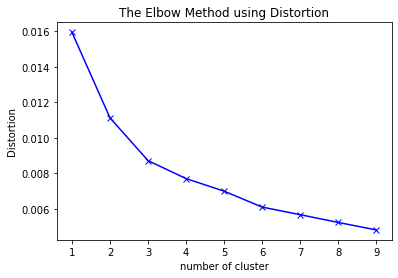

enter the appropriate number of groups:3
3.clustering Data
4.export Data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,latitude,longitude,number,name,address,groupe
0,-27.482279,153.028723,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,0
93,-27.474755,153.016687,118,118 - MELBOURNE ST / MERIVALE ST,Melbourne St / Merivale St,0
92,-27.471025,153.034306,92,92 - THORNTON ST FERRY TERMINAL / MAIN ST,Thornton St Ferry Terminal / Main St,0
90,-27.467963,153.023100,30,30 - ROMA ST / ANN ST,Roma St / Ann St,0
87,-27.479876,153.021076,114,114 - COLCHESTER ST / ERNEST ST,Colchester St / Ernest St,0
...,...,...,...,...,...,...
121,-27.492489,152.996768,148,148 - SANDFORD ST / AUSTRAL ST,Sandford St / Austral St,2
122,-27.487187,152.993052,146,146 - BRISBANE ST / GLEN RD,Brisbane St / Glen Rd,2
37,-27.476003,153.000676,140,140 - DUNMORE TCE / KINGSFORD ST,Dunmore Tce / Kingsford St,2
115,-27.489807,153.002405,106,106 - ORLEIGH ST / HOOGLEY ST,Orleigh St / Hoogley St,2


In [36]:
#import the necessary libraries
import warnings
import pandas as pd
import numpy as np
import json
from sklearn import cluster
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt


#initialize the variables
distortions = []  #It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
inertias = [] #It is the sum of squared distances of samples to their closest cluster center.
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #Limit the number of groups between 1 and 10
n=0
#function to read dataset in first time form json file, and then convert it into dataframe.
def readData():   
    
    with open(file) as f:
         d = json.load(f)
         df = pd.DataFrame.from_dict(d, orient='columns')
         return df

#function to remove the warning by using the catch_warnings context handler:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    
    
# =============================================================================
# main function
# Perform a clustering based on either the location or characteristics of 
# bike stations.
# =============================================================================

#read json file
print("1.==  Read data")
file = input("Enter your Json file:")
#file = 'Brisbane_CityBike.json'
data = readData()
newdf = data[['latitude','longitude']]
print("New Dataframe:\n",newdf)

#•Detrmine the optimal nubmer of k
print("2.choise of groupe number")
for k in K: 
    #Building and fitting the model 
    kmeanModel = cluster.KMeans(n_clusters=k).fit(newdf) 
    kmeanModel.fit(newdf)     
      
    distortions.append(sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdf.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdf.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point
#after which the distortion/inertia start decreasing in a linear fashion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('number of cluster') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#according to the elbow method, we can know the best
#number of groups to choose.    
n_cluster = int(input("enter the appropriate number of groups:"))

#clustering
print("3.clustering Data")
kmeans = cluster.KMeans(n_clusters=n_cluster)
kmeans.fit(newdf)
#index sorted groups
idk = np.argsort(kmeans.labels_)
#displaying observations and their groups
output=newdf.iloc[idk]

output.loc[:,"number"]=data['number'][idk]
output.loc[:,"name"]=data['name'][idk]
output.loc[:,"address"]=data['address'][idk]
output.loc[:,"groupe"]=kmeans.labels_[idk]

print("4.export Data")
#write result to csv files
output.to_csv('/content/drive/My Drive/Groupe.csv')
output
